<a href="https://colab.research.google.com/github/bmounikareddy98/Machine-learning-assignments/blob/main/Multiple_linear_Regression(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

**The dataset is imported from github public repository**

In [159]:
url = 'https://raw.githubusercontent.com/bmounikareddy98/Machine-learning-assignments/main/insurance.csv'
dataset = pd.read_csv(url)

**The dataset is divided into dependent variables array and an independent variable array.**

In [160]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values



**The null are checked in the dataset(there aren't any)**

In [161]:
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**The values of dependent variables are shown 

In [135]:
print(X[1])

[18 'male' 33.77 1 'no' 'southeast']


**The independent variable is shown below**

In [136]:
print(Y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [162]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
print(X)

[[19 0 27.9 0 'yes' 'southwest']
 [18 1 33.77 1 'no' 'southeast']
 [28 1 33.0 3 'no' 'southeast']
 ...
 [18 0 36.85 0 'no' 'southeast']
 [21 0 25.8 0 'no' 'southwest']
 [61 0 29.07 0 'yes' 'northwest']]


In [163]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,4] = labelencoder.fit_transform(X[:, 4])
print(X)

[[19 0 27.9 0 1 'southwest']
 [18 1 33.77 1 0 'southeast']
 [28 1 33.0 3 0 'southeast']
 ...
 [18 0 36.85 0 0 'southeast']
 [21 0 25.8 0 0 'southwest']
 [61 0 29.07 0 1 'northwest']]


In [164]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,5] = labelencoder.fit_transform(X[:, 5])
print(X)

[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 ...
 [18 0 36.85 0 0 2]
 [21 0 25.8 0 0 3]
 [61 0 29.07 0 1 1]]


**Encoding the categorical data present in columns sex, smoker, region**

In [165]:
"""from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder(categories=[1])
X= onehotencoder.fit_transform(X)"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[1])

"""enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(dataset[['sex']]).toarray())
dataset = dataset.join(enc_df)
print(dataset)"""




[0.0 1.0 18 33.77 1 0 2]


"enc = OneHotEncoder(handle_unknown='ignore')\n# passing bridge-types-cat column (label encoded values of bridge_types)\nenc_df = pd.DataFrame(enc.fit_transform(dataset[['sex']]).toarray())\ndataset = dataset.join(enc_df)\nprint(dataset)"

In [155]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X)

[[19 'female' 27.9 ... 'southwest' 16884.924 1.0]
 [18 'male' 33.77 ... 'southeast' 1725.5523 0.0]
 [28 'male' 33.0 ... 'southeast' 4449.462 0.0]
 ...
 [18 'female' 36.85 ... 'southeast' 1629.8335 1.0]
 [21 'female' 25.8 ... 'southwest' 2007.945 1.0]
 [61 'female' 29.07 ... 'northwest' 29141.3603 1.0]]


In [166]:
ct_1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct_1.fit_transform(X))
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 18 33.77 0 2]


In [168]:
ct_2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct_2.fit_transform(X))
print(X[1])

[1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 18 33.77 0 2]


In [158]:
print(X[0][0])

1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


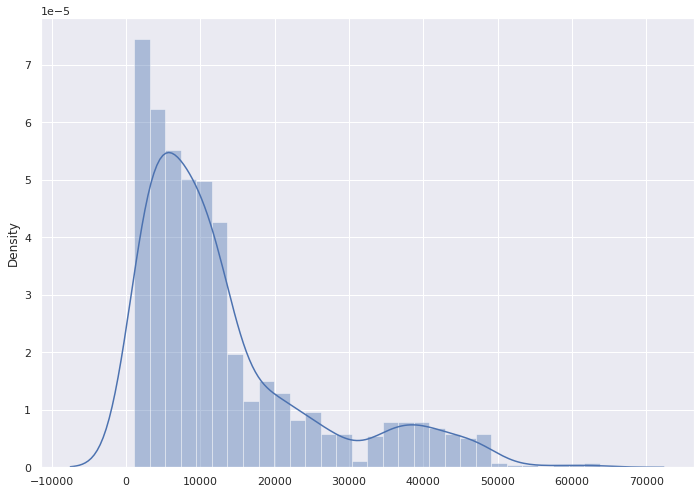

In [169]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

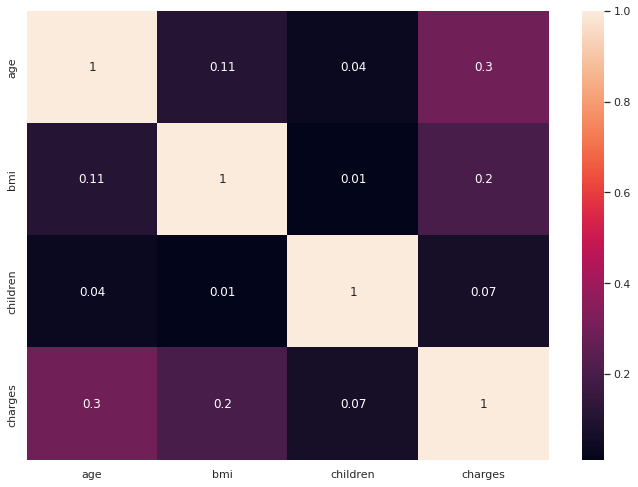

In [96]:
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [97]:
"""X= dataset[["age", "sex","bmi","smoker","region"]]"""

**Splitting the dataset into training and test sets**

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[10967.4   9724.53]
 [ 9731.64  8547.69]
 [38700.83 45702.02]
 [16010.62 12950.07]
 [ 6866.41  9644.25]
 [ 3897.04  4500.34]
 [ 1462.02  2198.19]
 [13594.88 11436.74]
 [ 8280.88  7537.16]
 [ 6761.76  5425.02]
 [ 3897.59  6753.04]
 [11019.64 10493.95]
 [ 8603.2   7337.75]
 [ 4048.74  4185.1 ]
 [27690.37 18310.74]
 [10375.99 10702.64]
 [11175.71 12523.6 ]
 [ 5964.52  3490.55]
 [ 8942.36  6457.84]
 [26909.28 33475.82]
 [34324.82 23967.38]
 [15019.85 12643.38]
 [11584.03 23045.57]
 [32286.8  23065.42]
 [ 4317.18  1674.63]
 [ 9067.13  4667.61]
 [ 1061.67  3732.63]
 [ 9412.82  7682.67]
 [ 4006.63  3756.62]
 [11122.8   8413.46]
 [ 8293.66  8059.68]
 [40130.   48970.25]
 [15375.16 12979.36]
 [13564.51 20630.28]
 [24633.08 14571.89]
 [ 5036.31  4137.52]
 [13592.33  8347.16]
 [30426.28 51194.56]
 [34150.31 40003.33]
 [ 3390.57  1880.49]
 [ 3929.45  5458.05]
 [ 4195.77  2867.12]
 [30342.62 20149.32]
 [40064.74 47496.49]
 [27859.34 36149.48]
 [ 5758.1  26018.95]
 [10268.48 19749.38]
 [ 7731.7   6

In [67]:
y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

6123.30165130058
0.7384680902393438


In [69]:
y_test_predict=regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2t = r2_score(Y_test, y_test_predict)
print(r2t)

0.7982416597402149
